In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer  
from sklearn.preprocessing import OneHotEncoder      
from statistics import mean

In [4]:
raw_data = pd.read_csv('Giaxe_dataset_ML.csv')


In [5]:
print('\n____________________________________ Dataset info ____________________________________')
print(raw_data.info())              
print('\n____________________________________ Some first data examples ____________________________________')
print(raw_data.head(6)) 
print('\n____________________________________ Counts on a feature ____________________________________')
print(raw_data['Hộp số'].value_counts()) 
print('\n____________________________________ Statistics of numeric features ____________________________________')
print(raw_data.describe())    
print('\n____________________________________ Get specific rows and cols ____________________________________')     
print(raw_data.loc[[0,5,20], ['Giống nhau - Loại xe', 'Giá - Triệu đồng']] ) 
print(raw_data.iloc[[0,5,20], [1, 7]] ) 


____________________________________ Dataset info ____________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   STT                   500 non-null    int64  
 1   Giống nhau - Loại xe  500 non-null    object 
 2   Giống nhau - Nhu cầu  500 non-null    object 
 3   Tỉnh Thành phố        500 non-null    object 
 4   Quận Huyện            500 non-null    object 
 5   Phường Xã             441 non-null    object 
 6   Đường Khu vực         0 non-null      float64
 7   Giá - Triệu đồng      500 non-null    int64  
 8   Ngày đăng             500 non-null    object 
 9   Hãng xe               497 non-null    object 
 10  Dòng xe               497 non-null    object 
 11  Xuất xứ               437 non-null    object 
 12  Năm sản xuất          497 non-null    float64
 13  Dung tích             0 non-null     

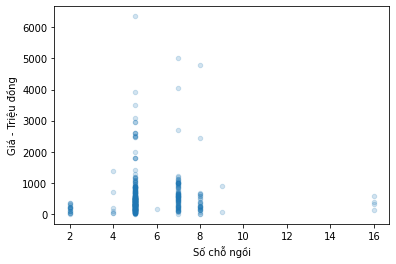

In [6]:
if 1:
    raw_data.plot(kind="scatter", y="Giá - Triệu đồng", x="Số chỗ ngồi", alpha=0.2)
    plt.savefig('figures/scatter_1_feat.png', format='png', dpi=300)
    plt.show()

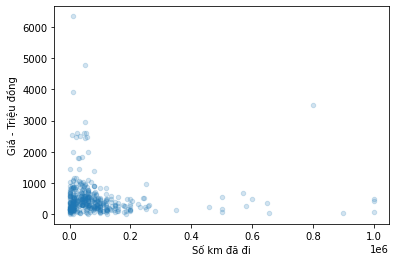

In [5]:
if 1:
    raw_data.plot(kind="scatter", y="Giá - Triệu đồng", x="Số km đã đi", alpha=0.2)
    plt.savefig('figures/scatter_2_feat.png', format='png', dpi=300)
    plt.show()


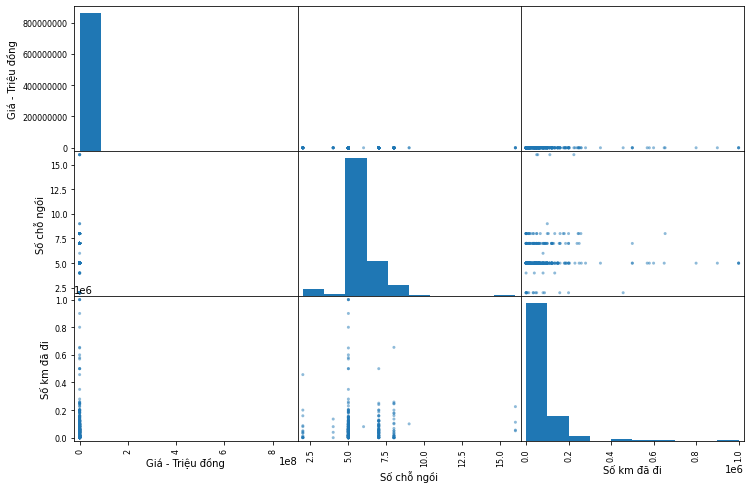

In [6]:
if 1:
    from pandas.plotting import scatter_matrix   
    features_to_plot = ["Giá - Triệu đồng", "Số chỗ ngồi", "Số km đã đi"]
    scatter_matrix(raw_data[features_to_plot], figsize=(12, 8)) 
    plt.savefig('figures/scatter_mat_all_feat.png', format='png', dpi=300)
    plt.show()

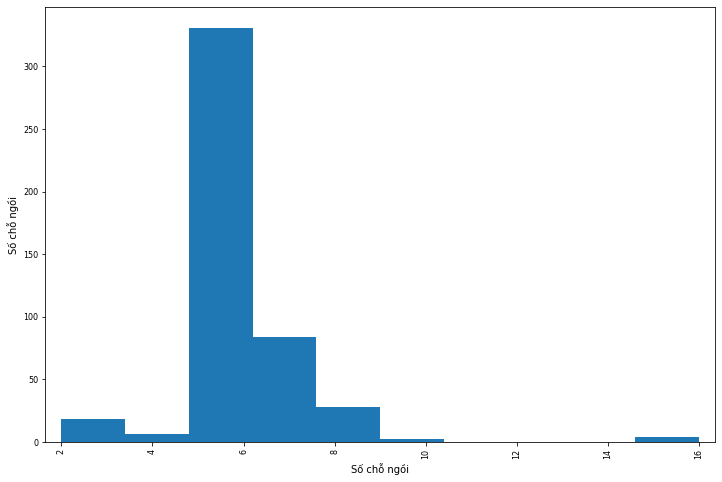

In [7]:
if 1:
    from pandas.plotting import scatter_matrix   
    features_to_plot = ["Số chỗ ngồi"]
    scatter_matrix(raw_data[features_to_plot], figsize=(12, 8)) 
    plt.show()

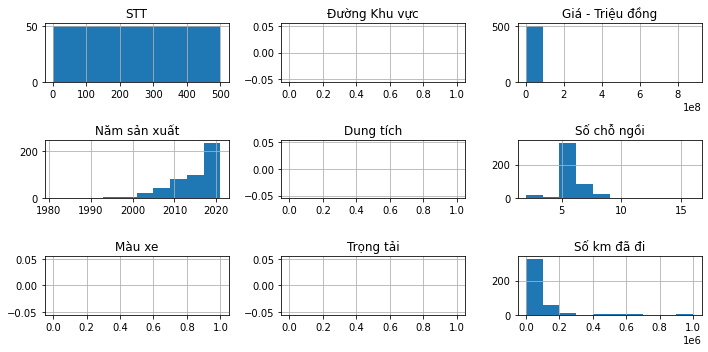

In [8]:
if 1:
    raw_data.hist(figsize=(10,5)) 
    plt.rcParams['xtick.labelsize'] = 10
    plt.rcParams['ytick.labelsize'] = 10
    plt.tight_layout()
    plt.savefig('figures/hist_raw_data.png', format='png', dpi=300) 
    plt.show()

In [7]:
corr_matrix = raw_data.corr()
print(corr_matrix) 
print(corr_matrix["Giá - Triệu đồng"].sort_values(ascending=False)) 

                       STT  Đường Khu vực  Giá - Triệu đồng  Năm sản xuất  \
STT               1.000000            NaN          0.041716      0.030227   
Đường Khu vực          NaN            NaN               NaN           NaN   
Giá - Triệu đồng  0.041716            NaN          1.000000      0.046550   
Năm sản xuất      0.030227            NaN          0.046550      1.000000   
Dung tích              NaN            NaN               NaN           NaN   
Số chỗ ngồi       0.002467            NaN          0.075534     -0.038514   
Màu xe                 NaN            NaN               NaN           NaN   
Trọng tải              NaN            NaN               NaN           NaN   
Số km đã đi       0.049028            NaN         -0.060488     -0.186964   

                  Dung tích  Số chỗ ngồi  Màu xe  Trọng tải  Số km đã đi  
STT                     NaN     0.002467     NaN        NaN     0.049028  
Đường Khu vực           NaN          NaN     NaN        NaN          NaN  
Giá 